## Д/з

#### * Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока). Сделайте вывод

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Стандартизация

In [4]:
X_st = X.copy().astype(np.float64)

In [5]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [6]:
X_st[1] = calc_std_fit(X[1])
X_st[2] = calc_std_fit(X[2])
X_st[3] = calc_std_fit(X[3])

L2 регуляризация

In [7]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [8]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

In [9]:
lambd = np.logspace(-2, 1, 30)
w_list = []
for i in range(len(lambd)):
    W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=lambd[i])
    w_list.append(W.copy())
    print(f'Labmda: {round(lambd[i], 6)}, W = {W}, MSE = {calc_mse(y, np.dot(W, X_st))}')
w_list = np.array(w_list)

Labmda: 0.01, W = [56.21890547  6.23067581 -0.16462974  6.42092637], MSE = 24.990883073277054
Labmda: 0.01269, W = [56.14377867  6.21197702 -0.11614592  6.38286989], MSE = 25.042922067566536
Labmda: 0.016103, W = [56.04873426  6.1886895  -0.05635143  6.33593623], MSE = 25.12611493174495
Labmda: 0.020434, W = [5.59285889e+01 6.15981923e+00 1.68682849e-02 6.27846332e+00], MSE = 25.258880782175805
Labmda: 0.025929, W = [55.77686857  6.12422529  0.10574603  6.20869139], MSE = 25.470311320764672
Labmda: 0.032903, W = [55.58552239  6.08063188  0.21248629  6.12487218], MSE = 25.806158442681216
Labmda: 0.041753, W = [55.34459336  6.02765828  0.33904097  6.02543372], MSE = 26.338010110325268
Labmda: 0.052983, W = [55.04185407  5.96387104  0.4868032   5.90920006], MSE = 27.177205881730167
Labmda: 0.067234, W = [54.66242487  5.88785921  0.65623495  5.77564802], MSE = 28.495667802031136
Labmda: 0.085317, W = [54.18840955  5.79832879  0.84647255  5.62515876], MSE = 30.556566201402905
Labmda: 0.1082

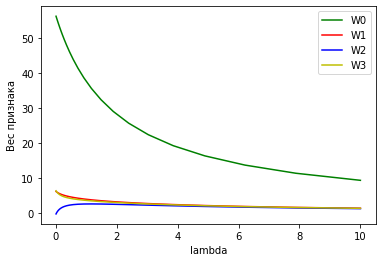

In [10]:
plt.xlabel('lambda')
plt.ylabel('Вес признака')

plt.plot(lambd, w_list[:, 0], color='g')
plt.plot(lambd, w_list[:, 1],  color='r')
plt.plot(lambd, w_list[:, 2],  color='b')
plt.plot(lambd, w_list[:, 3], color='y')

plt.legend(['W0', 'W1', 'W2', 'W3'])

Выводы. \
Чем больше lambda, тем больше она накладывает ограничения на веса, тем самым, модель не будет достаточно обучаться тренировочным данным. И, наоборот, чем меньше lambda, тем больше возрастает риск переробучения.  

In [18]:
# Проверка 
def normal_equation(X, y):
    return np.linalg.solve((X).dot(X.T), X.dot(y))

normal_eq_w = normal_equation(X, y)
print(calc_mse(y, np.dot(X.T, normal_eq_w)))

24.904618876908398


#### * Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизаци

Можно, но дополнительных результатов это не даст. В любом случае получится один и тот же результат что и при отдельной нормализации или стандартизации.

#### * Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [17]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W)) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

In [26]:
lambd = np.logspace(-2, 2.1, 30)
w_list = []
for i in range(len(lambd)):
    W = eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=lambd[i])
    w_list.append(W.copy())
    print(f'Labmda: {round(lambd[i], 6)}, W = {W}, MSE = {calc_mse(y, np.dot(W, X_st))}')
w_list = np.array(w_list)

Labmda: 0.01, W = [56.495       6.28284243 -0.2967339   6.52797166], MSE = 24.90526210908332
Labmda: 0.013848, W = [56.49307612  6.27506129 -0.27383307  6.5112758 ], MSE = 24.90585084837094
Labmda: 0.019176, W = [56.49041199  6.26428617 -0.24212064  6.48815582], MSE = 24.90697924095569
Labmda: 0.026554, W = [56.48672276  6.24936502 -0.19820593  6.45613975], MSE = 24.909142261565883
Labmda: 0.036772, W = [56.481614    6.22870254 -0.13739371  6.41180451], MSE = 24.91328899364181
Labmda: 0.050921, W = [ 5.64745395e+01  6.20008986e+00 -5.31834888e-02  6.35041102e+00], MSE = 24.921239157324358
Labmda: 0.070514, W = [ 5.64647430e+01  6.17906798e+00 -6.31126254e-04  6.30887198e+00], MSE = 24.92826760347017
Labmda: 0.097646, W = [5.64511769e+01 6.17114404e+00 5.92547691e-04 6.30085593e+00], MSE = 24.930784227922604
Labmda: 0.135218, W = [ 5.64323910e+01  6.16013091e+00 -6.14334714e-04  6.28969491e+00], MSE = 24.935545132190008
Labmda: 0.187247, W = [5.64063767e+01 6.14491085e+00 5.29607855e-04

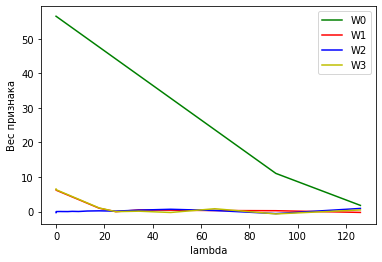

In [27]:
plt.xlabel('lambda')
plt.ylabel('Вес признака')

plt.plot(lambd, w_list[:, 0], color='g')
plt.plot(lambd, w_list[:, 1],  color='r')
plt.plot(lambd, w_list[:, 2],  color='b')
plt.plot(lambd, w_list[:, 3], color='y')

plt.legend(['W0', 'W1', 'W2', 'W3'])